Task 1

In [8]:
import math
import pandas
import matplotlib.pyplot as plt

In [9]:
df = pandas.read_csv("Input/publTitles.csv")

In [10]:
df.head()

,#PUBLICATION_ID,TITLE_LENGTH,TITLE
0,books/acm/17/JamesLSCO17,52,Perspectives on learning with multimodal techn...
1,books/acm/17/KatsamanisPTM17,31,Multimodal gesture recognition.
2,books/acm/17/MacLeanSS17,79,Multisensory haptic interactions: understandin...
3,books/acm/17/OSCSPK2017,122,The Handbook of Multimodal-Multisensor Interfa...
4,books/acm/18/0001A18,95,Real-time sensing of affect and social signals...


In [11]:
print(df['TITLE_LENGTH'].describe())

count    521289.000000
mean         75.298717
std          31.819131
min           1.000000
25%          56.000000
50%          75.000000
75%          93.000000
max        1362.000000
Name: TITLE_LENGTH, dtype: float64


Text(0.5, 1.0, 'Box plot of TITLE_LENGTH')

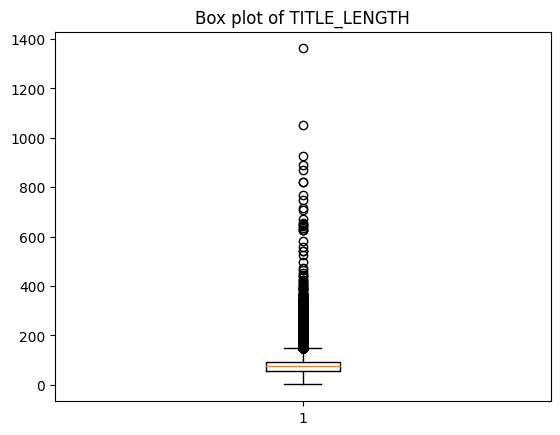

In [12]:
plt.boxplot(df['TITLE_LENGTH'])
plt.title('Box plot of {}'.format('TITLE_LENGTH'))

In the dataset, we noticed there is a high concentration around the mean. But also, there are many outliers.

Task 2

To investigate the patterns with the dataset, we used multiple bins options to identify potential anomalies. The anomalies are viisble on small bins size like 10, but starting 200 they appear to the sight.

As a scientific ground we used the Sturge's rule, but the number of bins was only 20 which gave us an unsatisfactory result. We decided to process with 500 bins.



In [13]:
print(1+round(math.log2(df['TITLE_LENGTH'].count())))

20


(0.0, 25000.0)

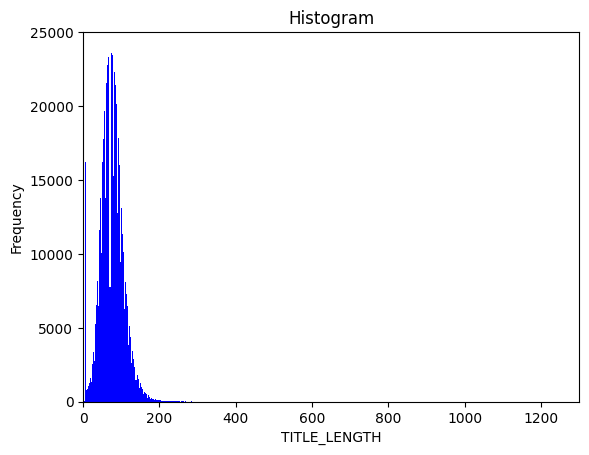

In [14]:
plt.hist(df['TITLE_LENGTH'], bins=500, color='blue')
plt.xlabel('TITLE_LENGTH')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xlim(0, 1300)
plt.ylim(0, 25000)

The column in the beginning looks suspecious.

(0.0, 25000.0)

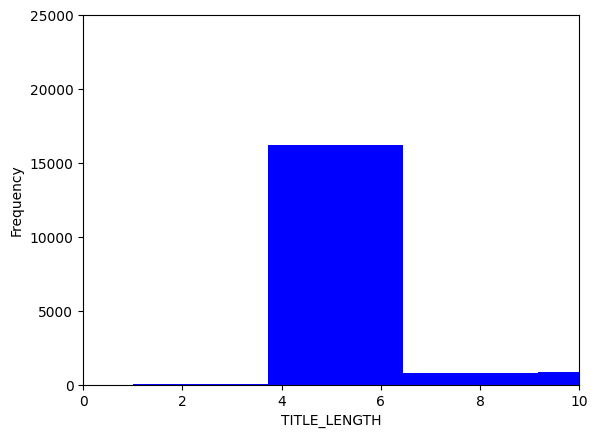

In [15]:
plt.hist(df['TITLE_LENGTH'], bins=500, color='blue')
plt.xlabel('TITLE_LENGTH')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.ylim(0, 25000)

We zoom in to see what values are unusually distributed.

In [16]:
count = ((df['TITLE_LENGTH'] >= 4) & (df['TITLE_LENGTH'] <= 7)).sum()
count

16322

In [17]:
df[(df['TITLE_LENGTH'] >= 4) & (df['TITLE_LENGTH'] <= 7)].head(2000)

,#PUBLICATION_ID,TITLE_LENGTH,TITLE
21,books/ams/04/Trevisan04,4,NaN
30,books/ap/91/MontefuscoGP91,4,NaN
46,books/aw/Baeza-YatesR99,4,NaN
77,books/crc/13/GarciaS13b,7,Towers.
136,books/crc/tucker97/Caughey97,4,NaN
...,...,...,...
64539,conf/dihu/QueirozBP16,4,NaN
64545,conf/dihu/RidgeCPK14,4,NaN
64554,conf/dihu/SakamotoVW18,4,NaN
64562,conf/dihu/Schulz20,4,NaN


In [18]:
removed_47 = df[(df['TITLE_LENGTH'] > 4) & (df['TITLE_LENGTH'] > 7)]

In [19]:
removed_47.head(200)

,#PUBLICATION_ID,TITLE_LENGTH,TITLE
0,books/acm/17/JamesLSCO17,52,Perspectives on learning with multimodal techn...
1,books/acm/17/KatsamanisPTM17,31,Multimodal gesture recognition.
2,books/acm/17/MacLeanSS17,79,Multisensory haptic interactions: understandin...
3,books/acm/17/OSCSPK2017,122,The Handbook of Multimodal-Multisensor Interfa...
4,books/acm/18/0001A18,95,Real-time sensing of affect and social signals...
...,...,...,...
206,books/daglib/0000757,37,PHP pocket reference - web scripting.
207,books/daglib/0000781,59,Bugs in writing - a guide to debugging your pr...
208,books/daglib/0001083,91,Numerische Mathematik mit Matlab - eine Einfüh...
209,books/daglib/0001189,86,"Computergrafik und Farbmetrik - Farbsysteme, P..."


(0.0, 25000.0)

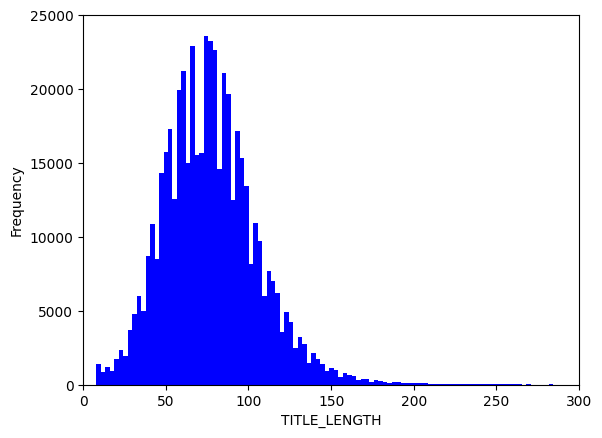

In [20]:
plt.hist(removed_47['TITLE_LENGTH'], bins=500, color='blue')
plt.xlabel('TITLE_LENGTH')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.ylim(0, 25000)

There are soome outliers which are located outsidie of the normal distribution's body.

In [21]:
print(removed_47['TITLE_LENGTH'].describe())

count    504903.000000
mean         77.611945
std          29.581752
min           8.000000
25%          58.000000
50%          76.000000
75%          94.000000
max        1362.000000
Name: TITLE_LENGTH, dtype: float64


In [22]:
a=removed_47['TITLE_LENGTH'].mean() + 3*removed_47['TITLE_LENGTH'].std()
b=max(0,removed_47['TITLE_LENGTH'].mean() - 3*removed_47['TITLE_LENGTH'].std())
print('Highest allowed {}'.format(a))
print('Lowest allowed {}'.format(b))

Highest allowed 166.35720129778088
Lowest allowed 0


In [30]:
count = (removed_47['TITLE_LENGTH'] >= a).sum()
count

4032

In [24]:
within_range = removed_47[(removed_47['TITLE_LENGTH'] >= b) & (removed_47['TITLE_LENGTH'] <= a)]

(0.0, 15000.0)

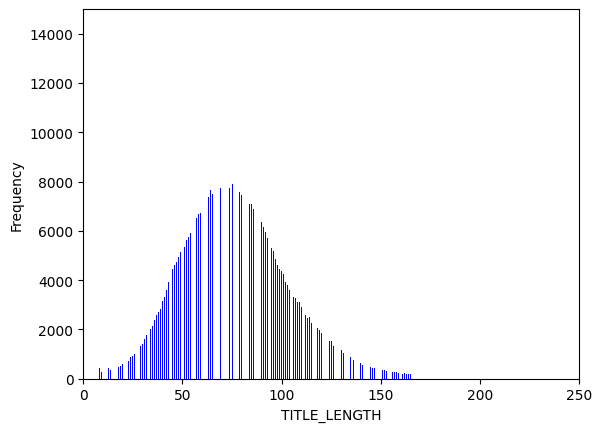

In [25]:
plt.hist(within_range['TITLE_LENGTH'], bins=500, color='blue')
plt.xlabel('TITLE_LENGTH')
plt.ylabel('Frequency')
plt.xlim(0, 250)
plt.ylim(0, 15000)

In [26]:
print(within_range['TITLE_LENGTH'].describe())

count    500871.000000
mean         76.600893
std          26.950733
min           8.000000
25%          58.000000
50%          75.000000
75%          93.000000
max         166.000000
Name: TITLE_LENGTH, dtype: float64


In [27]:
within_range[(within_range['TITLE_LENGTH']>40) & (within_range['TITLE_LENGTH']<100)].head(200)

,#PUBLICATION_ID,TITLE_LENGTH,TITLE
0,books/acm/17/JamesLSCO17,52,Perspectives on learning with multimodal techn...
2,books/acm/17/MacLeanSS17,79,Multisensory haptic interactions: understandin...
4,books/acm/18/0001A18,95,Real-time sensing of affect and social signals...
7,books/acm/19/KirchnerFK19,99,Embedded multimodal interfaces in robotics: ap...
8,books/acm/19/Lamport19a,60,A new solution of Dijkstra's concurrent progra...
...,...,...,...
320,books/daglib/0010661,45,Concurrent and distributed computing in Java.
321,books/daglib/0010681,41,qmail - managing unix-based mail systems.
322,books/daglib/0010682,76,SQL - pocket guide: a guide to SQL usage: Orac...
323,books/daglib/0010865,66,Digital design and implementation with field p...


Another thing we noticed is that there is a gap in the bell curve where X = 70.

In [28]:
l = within_range['TITLE_LENGTH'].unique()

In [29]:
for i in range(8, len(l)):
    if i not in l:
        print("not in the list {}".format(i))

not in the list 70


Indeed, there is no title of the length 70. It's strange and it potentially affects the average in a minor way making it smaller.